## 0. Introduction

### 0.1. Google Colab

In [67]:
# Mounting a google drive for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

### 0.2. Package installations

In [68]:
# Import dependencies
import time
import random

# Standard Data manipulation
import numpy as np
import pandas as pd


# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Scikit-learn
import sklearn
sklearn.set_config(enable_metadata_routing=True)


In [69]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## 1. Data import

In [70]:
# Importing the data for Google Colab
# test_data = pd.read_csv('/content/drive/MyDrive/_Temp_DataScience/ISA/Projekt ML/testing_sample.csv')
# train_data = pd.read_csv('/content/drive/MyDrive/_Temp_DataScience/ISA/Projekt ML/training_sample.csv')

# Importing the data for local machine
test_data = pd.read_csv('testing_sample.csv')
train_data = pd.read_csv('training_sample.csv')

In [71]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int64 
 2   basket_add_list          455401 non-null  int64 
 3   basket_add_detail        455401 non-null  int64 
 4   sort_by                  455401 non-null  int64 
 5   image_picker             455401 non-null  int64 
 6   account_page_click       455401 non-null  int64 
 7   promo_banner_click       455401 non-null  int64 
 8   detail_wishlist_add      455401 non-null  int64 
 9   list_size_dropdown       455401 non-null  int64 
 10  closed_minibasket_click  455401 non-null  int64 
 11  checked_delivery_detail  455401 non-null  int64 
 12  checked_returns_detail   455401 non-null  int64 
 13  sign_in                  455401 non-null  int64 
 14  saw_checkout        

## 2. Simple EDA
Simple Exploratory Data Analysis will be performed.

| Column Name              | Description                                                                                                                                           |
|--------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------|
| UserID                   | A unique identifier for the visitor                                                                                                                   |
| basket_icon_click        | Indicates whether the visitor clicked on the shopping basket icon                                                                                     |
| basket_add_list          | Indicates whether the visitor added a product to their shopping cart on the 'list' page                                                               |
| basket_add_detail        | Indicates whether the visitor added a product to their shopping cart on the 'detail' page                                                             |
| sort_by                  | Indicates whether the visitor sorted products on a page                                                                                               |
| image_picker             | Indicates whether the visitor used the image picker                                                                                                   |
| account_page_click       | Indicates whether the visitor visited their account page                                                                                              |
| promo_banner_click       | Indicates whether the visitor clicked on a promo banner                                                                                               |
| detail_wishlist_add      | Indicates whether the visitor added a product to their wishlist from the 'detail' page                                                                |
| list_size_dropdown       | Indicates whether the visitor interacted with a product dropdown                                                                                      |
| closed_minibasket_click  | Indicates whether the visitor closed their mini shopping basket                                                                                       |
| checked_delivery_detail  | Indicates whether the visitor viewed the delivery FAQ area on a product page                                                                          |
| checked_returns_detail   | Indicates whether the visitor checked the returns FAQ area on a product page                                                                          |
| sign_in                  | Indicates whether the visitor signed in to the website                                                                                               |
| saw_checkout             | Indicates whether the visitor viewed the checkout                                                                                                     |
| saw_sizecharts           | Indicates whether the visitor viewed a product size chart                                                                                             |
| saw_delivery             | Indicates whether the visitor viewed the delivery FAQ page                                                                                            |
| saw_account_upgrade      | Indicates whether the visitor viewed the account upgrade page                                                                                         |
| saw_homepage             | Indicates whether the visitor viewed the website homepage                                                                                             |
| device_mobile            | Indicates whether the visitor accessed the website from a mobile device                                                                               |
| device_computer          | Indicates whether the visitor accessed the website from a desktop device                                                                              |
| device_tablet            | Indicates whether the visitor accessed the website from a tablet device                                                                               |
| returning_user           | Indicates whether the visitor is a new or returning user                                                                                              |
| loc_uk                   | Indicates whether the visitor was located in the UK, based on their IP address                                                                        |
| ordered                  | Indicates whether the customer placed an order                                                                                                        |


```UserID``` Column will not be needed

In [72]:
test_data = test_data.drop(['UserID'], axis = 1)
train_data = train_data.drop(['UserID'], axis = 1)

In [73]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
basket_icon_click,455401.0,0.099150,0.298864,0.0,0.0,0.0,0.0,1.0
basket_add_list,455401.0,0.074521,0.262617,0.0,0.0,0.0,0.0,1.0
basket_add_detail,455401.0,0.112916,0.316490,0.0,0.0,0.0,0.0,1.0
sort_by,455401.0,0.036849,0.188391,0.0,0.0,0.0,0.0,1.0
image_picker,455401.0,0.026735,0.161307,0.0,0.0,0.0,0.0,1.0
account_page_click,455401.0,0.003570,0.059647,0.0,0.0,0.0,0.0,1.0
promo_banner_click,455401.0,0.016208,0.126274,0.0,0.0,0.0,0.0,1.0
detail_wishlist_add,455401.0,0.003511,0.059151,0.0,0.0,0.0,0.0,1.0
list_size_dropdown,455401.0,0.230362,0.421065,0.0,0.0,0.0,0.0,1.0
closed_minibasket_click,455401.0,0.017277,0.130302,0.0,0.0,0.0,0.0,1.0


In [74]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
basket_icon_click,151655.0,0.074228,0.262142,0.0,0.0,0.0,0.0,1.0
basket_add_list,151655.0,0.060954,0.239247,0.0,0.0,0.0,0.0,1.0
basket_add_detail,151655.0,0.085444,0.279542,0.0,0.0,0.0,0.0,1.0
sort_by,151655.0,0.036438,0.187378,0.0,0.0,0.0,0.0,1.0
image_picker,151655.0,0.025334,0.157137,0.0,0.0,0.0,0.0,1.0
account_page_click,151655.0,0.003158,0.056112,0.0,0.0,0.0,0.0,1.0
promo_banner_click,151655.0,0.014177,0.118220,0.0,0.0,0.0,0.0,1.0
detail_wishlist_add,151655.0,0.003053,0.055170,0.0,0.0,0.0,0.0,1.0
list_size_dropdown,151655.0,0.215984,0.411504,0.0,0.0,0.0,0.0,1.0
closed_minibasket_click,151655.0,0.013412,0.115031,0.0,0.0,0.0,0.0,1.0


The test dataset does not contain order data. It should be used to see how the model works. However, without knowing whether a customer has placed an order or not, it does not provide any relevant information for analysis. For the further analysis, the test dataset will not be taken into consideration.

Based on the mean and standard deviation of each column, the following conclusions can be drawn:

In [75]:
# %%cudf.pandas.profile

In [76]:
descriptions = [
    'customers has clicked on the shopping basket icon',
    'customers has added a product to their shopping cart on the "list" page',
    'customers has added a product to their shopping cart on the "detail" page',
    'customers has sorted products on a page',
    'customers has used the image picker',
    'customers has visited their account page',
    'customers has clicked on a promo banner',
    'customers has added a product to their wishlist from the "detail" page',
    'customers has interacted with a product dropdown',
    'customers has closed their mini shopping basket',
    'customers has viewed the delivery FAQ area on a product page',
    'customers has checked the returns FAQ area on a product page',
    'customers has signed in to the website',
    'customers has viewed the checkout',
    'customers has viewed a product size chart',
    'customers has viewed the delivery FAQ page',
    'customers has viewed the account upgrade page',
    'customers has viewed the website homepage',
    'customers has accessed the website from a mobile device',
    'customers has accessed the website from a desktop device',
    'customers has accessed the website from a tablet device',
    'customers is a returning user',
    'customers was located in the UK based on their IP address',
    'customers has placed an order',
]

In [77]:
# creating a mean list because colab is slow with for loops...
mean_list = train_data.describe().T['mean'].tolist()

# Loop for descriptive summary
for i, mean in enumerate(mean_list):
  print (round(mean*100,2),'% ',descriptions[i])

9.91 %  customers has clicked on the shopping basket icon
7.45 %  customers has added a product to their shopping cart on the "list" page
11.29 %  customers has added a product to their shopping cart on the "detail" page
3.68 %  customers has sorted products on a page
2.67 %  customers has used the image picker
0.36 %  customers has visited their account page
1.62 %  customers has clicked on a promo banner
0.35 %  customers has added a product to their wishlist from the "detail" page
23.04 %  customers has interacted with a product dropdown
1.73 %  customers has closed their mini shopping basket
6.29 %  customers has viewed the delivery FAQ area on a product page
0.92 %  customers has checked the returns FAQ area on a product page
8.88 %  customers has signed in to the website
8.01 %  customers has viewed the checkout
0.04 %  customers has viewed a product size chart
0.55 %  customers has viewed the delivery FAQ page
0.11 %  customers has viewed the account upgrade page
29.0 %  custome

***Questions:***
* Is clicking on a promo banner providing more orders?
* Are returning users more often to place an order?
* Are how much and which actions are taken by the returning users? Are they going directly into the checkout, indicating, that they have to think about the purchase?

First of all, let's investigate for users, which has visited the Webpage and didn't take any action.

In [78]:
no_action_columns = [
    'device_mobile',
    'device_computer',
    'device_tablet',    
    'returning_user',
    'loc_uk',
    'ordered'
]

In [79]:
no_of_no_actions = train_data[(train_data.loc[:, ~train_data.columns.isin(no_action_columns)] == 0).all(axis=1)].shape[0]
no_of_actions = len(train_data) - no_of_no_actions
print(f'{no_of_no_actions} visitors did not carry out any action')

235340 visitors did not carry out any action


Since these records do not provide any information for modeling, they will be discarded by preparing the data for machine learning

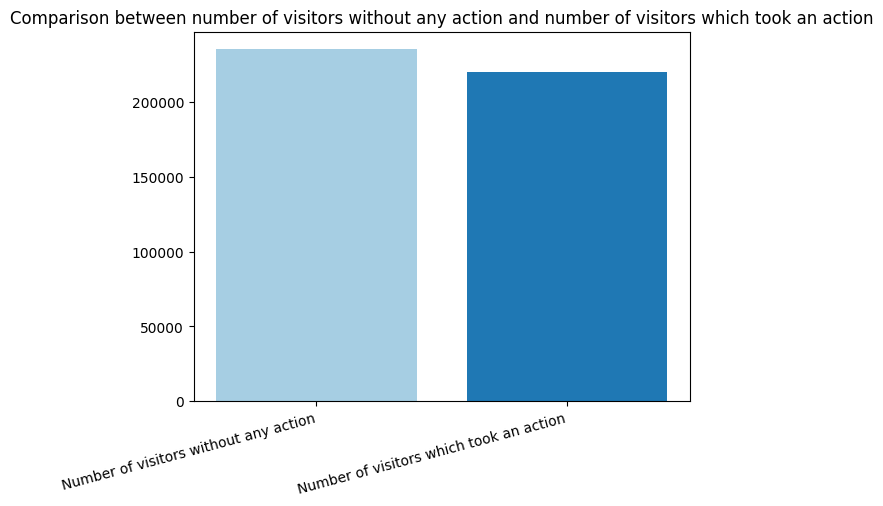

In [80]:
# Distribution chart for visitors who took action and took no action

fig, ax = plt.subplots()
bar_colors = sns.color_palette('Paired', n_colors=no_of_actions)
bar_labels = ['Number of visitors without any action','Number of visitors which took an action']
ax.bar(bar_labels, [no_of_no_actions,no_of_actions], color=bar_colors)

ax.set_title('Comparison between number of visitors without any action and number of visitors which took an action')
plt.xticks(rotation=15, ha='right')


plt.show()

## 4. Cleaning and Spliting the Data

The data set will be subsumed due to:
* A large amount of data that does not contribute any information --> the website visitor did not perform any action. Colloquially speaking, he went in and left.
* This is a group project. The team consists of 4 people and the data set will be divided accordingly. Details will be described later.

**Cleaning the DataFrame - only the information in which the visitor made the action on the website.**

In [81]:
df_cleaned = train_data[~(train_data.loc[:, ~train_data.columns.isin(no_action_columns)] == 0).all(axis=1)]
df_cleaned.shape

(220061, 24)

**Spliting the Data**

In [82]:
df_train_clean = df_cleaned.sort_values(by='ordered', ascending= False).reset_index(drop=True)

# list of names + separation of test collection
names = ['Ada', 'Darek', 'Grzesiek', 'Ola', 'test']
no_of_orders = df_train_clean["ordered"].sum()


# name selection function
def get_name(index):
    return names[index % len(names)]

# add a new column - ordered = 1 - everyone (with the test set separated), ordered = 0 - one by one names

df_train_clean['who'] = df_train_clean.apply(lambda row: get_name(row.name) if row['ordered'] == 0 else ('test' if row.name < no_of_orders * 0.2 else 'wszyscy'), axis=1)

In [83]:
df_train_clean.who[df_train_clean['ordered'] == 0].value_counts()

who
Ola         40194
test        40194
Ada         40194
Darek       40193
Grzesiek    40193
Name: count, dtype: int64

In [84]:
df_train_clean.who.value_counts()

who
test        44013
Ola         40194
Ada         40194
Darek       40193
Grzesiek    40193
wszyscy     15274
Name: count, dtype: int64

In [85]:
# Let's check the proportion of orders in the entire df_train_clean set and in the set spun out for testing

orders_to_total_all = df_train_clean['ordered'].sum() / df_train_clean['ordered'].count()
orders_to_total_test = df_train_clean['ordered'][df_train_clean['who'] == 'test'].sum() / df_train_clean['ordered'][df_train_clean['who'] == 'test'].count()

print(f'percentage of total orders df_train_clean {orders_to_total_all}')
print(f'percentage of orders in test df_train_clean {orders_to_total_test}')

percentage of total orders df_train_clean 0.0867623068149286
percentage of orders in test df_train_clean 0.08676981800831572


In [86]:
# creating a database for a specific person - just change your name
df = df_train_clean[df_train_clean['who'].isin(['wszyscy', 'Grzesiek'])].drop(columns=['who'], axis=1)

In [87]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
basket_icon_click,55467.0,0.309301,0.462210,0.0,0.0,0.0,1.0,1.0
basket_add_list,55467.0,0.213082,0.409489,0.0,0.0,0.0,0.0,1.0
basket_add_detail,55467.0,0.339697,0.473611,0.0,0.0,0.0,1.0,1.0
sort_by,55467.0,0.077902,0.268020,0.0,0.0,0.0,0.0,1.0
image_picker,55467.0,0.060577,0.238554,0.0,0.0,0.0,0.0,1.0
account_page_click,55467.0,0.010385,0.101375,0.0,0.0,0.0,0.0,1.0
promo_banner_click,55467.0,0.036941,0.188618,0.0,0.0,0.0,0.0,1.0
detail_wishlist_add,55467.0,0.007770,0.087807,0.0,0.0,0.0,0.0,1.0
list_size_dropdown,55467.0,0.487695,0.499853,0.0,0.0,0.0,1.0,1.0
closed_minibasket_click,55467.0,0.050571,0.219121,0.0,0.0,0.0,0.0,1.0





## 5. Further EDA

Let's try to answer the questions:
* Is clicking on a promo banner providing more orders?
* Are returning users more often to place an order?
* Are how much and which actions are taken by the returning users? Are they going directly into the checkout, indicating, that they have to think about the purchase?

In [88]:
df_order_device = (df[['device_mobile', 'device_computer', 'device_tablet','ordered']]
                    .groupby(['device_mobile', 'device_computer', 'device_tablet'])
                    .count()
                    .reset_index())
df_order_device

,device_mobile,device_computer,device_tablet,ordered
0,0,0,1,7470
1,0,1,0,13145
2,0,1,1,62
3,1,0,0,34278
4,1,0,1,172
5,1,1,0,331
6,1,1,1,9


In [89]:
df[(df['device_mobile'] == 1) & (df['device_computer'] == 1) & (df['device_tablet'] == 1)].nunique().sum()

37

Look's like we have an False Values. The same userID is referenced to "visitor" not to "User". It means, that the visitor cannot be on 2 or more devices parallel. Those rows will be eliminated

In [90]:
df_mobile_clean = df[(df['device_mobile'] == 1) & (df['device_computer'] == 0) & (df['device_tablet'] == 0) |
                     (df['device_mobile'] == 0) & (df['device_computer'] == 1) & (df['device_tablet'] == 0) |
                     (df['device_mobile'] == 0) & (df['device_computer'] == 0) & (df['device_tablet'] == 1)
]
df = df_mobile_clean.copy()

In [91]:
df_order_device = (df_mobile_clean[['device_mobile', 'device_computer', 'device_tablet','ordered']]
                    .groupby(['device_mobile', 'device_computer', 'device_tablet'])
                    .count()
                    )
df_order_device

ordered
device_mobile device_computer device_tablet         
0             0               1                 7470
              1               0                13145
1             0               0                34278

In [92]:
# Grupowanie wierszy po wszystkich kolumnach i liczenie liczebności
aggregated_df = df.groupby(df.columns.tolist())\
                    .size()\
                    .reset_index(name='count')\
                    .sort_values(by='count', ascending=False)

aggregated_df.head()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered,count
11,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,1,0,3785
9,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,3369
288,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,1,0,2479
286,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1845
300,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,1,1,0,1666


In [93]:
agg_df_ordered = aggregated_df[aggregated_df['ordered'] == 1]
agg_df_ordered.head(10)

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered,count
4111,1,1,1,0,0,0,0,0,1,0,...,0,0,1,1,0,0,1,1,1,631
2730,1,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,1,1,497
2714,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,1,361
3682,1,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,1,1,1,340
2940,1,0,1,0,0,0,0,0,1,0,...,0,0,1,1,0,0,1,1,1,316
1038,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,1,308
2337,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,1,1,266
4091,1,1,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,1,1,262
1056,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,1,1,257
1034,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,251


In [94]:
# Przekształcenie do długiego formatu
df_long = pd.melt(df_mobile_clean, id_vars=['ordered'], value_vars=['device_mobile', 'device_computer', 'device_tablet'], var_name='device_type', value_name='has_device')

# Filtrowanie tak, aby zachować tylko wiersze gdzie 'has_device' == 1
df_filtered = df_long[df_long['has_device'] == 1].drop('has_device', axis=1)


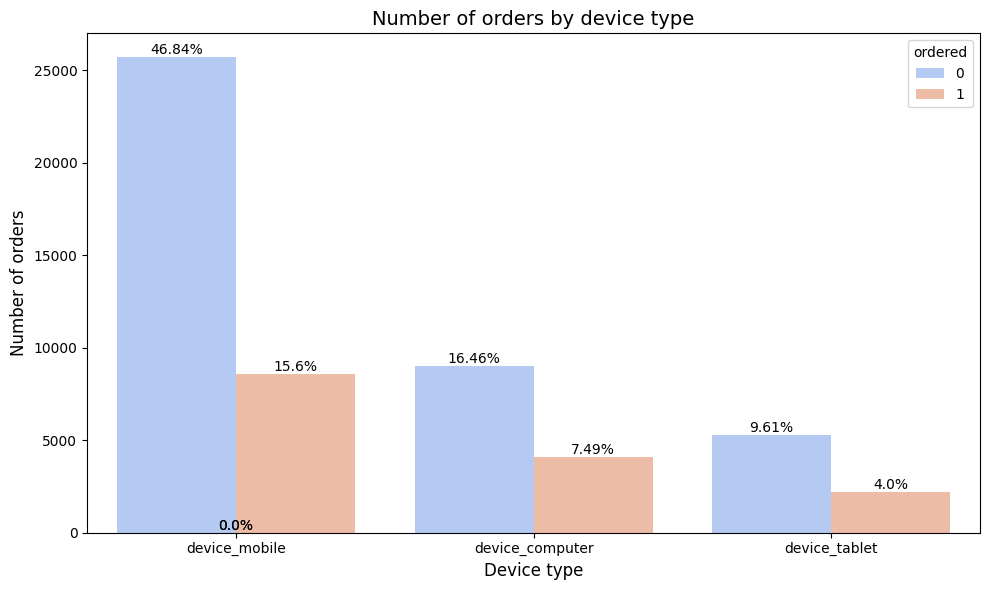

In [95]:
# Creating a countplot chart
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=pd.DataFrame(df_filtered), x='device_type', hue='ordered', palette='coolwarm')

# Adding annotations with "count" values above the bars
for p in ax.patches:
    ax.annotate(f"{round(p.get_height()/len(df_filtered)*100,2)}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Set title and axis labels
ax.set_title("Number of orders by device type", fontsize=14)
ax.set_xlabel("Device type", fontsize=12)
ax.set_ylabel("Number of orders", fontsize=12)

# Displaying the chart
plt.tight_layout()
plt.show()


In [96]:
# Which device was commonly used to place an order?

df_common_device = df_mobile_clean[['device_mobile', 'device_computer', 'device_tablet','ordered']].groupby(['ordered']).sum()
df_common_device

,device_mobile,device_computer,device_tablet
ordered,,,
0,25714,9033,5276
1,8564,4112,2194


In [97]:
orders = df_mobile_clean['ordered'].sum()
orders

14870

In [98]:
for col in df_common_device.columns.tolist():
  print(f'{round(df_common_device[col][1]/orders*100,2)}% orders were made using {col}, which is {round(df_common_device[col][1]/df_common_device[col][0]*100,2)}% of the users of this device')

57.59% orders were made using device_mobile, which is 33.3% of the users of this device
27.65% orders were made using device_computer, which is 45.52% of the users of this device
14.75% orders were made using device_tablet, which is 41.58% of the users of this device


It can be assumed that the most convincing device for shopping is a computer, slightly less tablets, and only 1/3 of purchases are made via mobile devices.

### Parcats and Sankey plots

**Preparations**

In [99]:
# DataFrame definitions for Parcats and Sankey
df_pc = (df.sample(n=5000)           # Sampling the DataFrame for better performance
           .copy()                    # copy the df in memory
           .reset_index(drop=True))   # Reset the index
df_pc.head()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
2,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,1


In [100]:
class ParcatsSankeyPlot:
    def __init__(self, df, columns, chart='sankey', w=1200, h=800):
        self.df = df
        self.columns = columns
        self.chart = chart
        self.w = w
        self.h = h

    def create_nodes(self):
        dict_of_nodes = {}
        for col in self.columns:
            dict_of_nodes[col] = self.df[col].unique().tolist()
        return dict_of_nodes

    def create_node_labels(self):
        dict = self.create_nodes()
        node_labels = []
        for key, val in dict.items():
            for i in val:
                node_labels.append(str(key) + ':' + str(i))
        return node_labels

    def label_to_index(self, node_labels):
        label_map = {label: i for i, label in enumerate(node_labels)}
        return label_map

    def get_label_index(self, labels_index, col, val):
        key = str(col) + ':' + str(val)
        return labels_index[key]

    def get_keys_by_value(self, dictionary, value):
        for key, val in dictionary.items():
            if val == value:
                return key

    def create_source_target(self):
        dict_of_nodes = self.create_nodes()
        node_labels = self.create_node_labels()
        labels_index = self.label_to_index(node_labels)
        source_target_dict = {}
        keys = list(dict_of_nodes.keys())

        for k in range(len(keys) - 1):
            col1 = keys[k]
            col2 = keys[k + 1]
            for val1, val2 in zip(self.df[col1], self.df[col2]):
                source = self.get_label_index(labels_index, col1, val1)
                target = self.get_label_index(labels_index, col2, val2)
                link_value = 1
                source_target_dict[(source, target)] = source_target_dict.get((source, target), 0) + link_value

        source_list = []
        target_list = []
        value_list = []
        for key, value in source_target_dict.items():
            source_list.append(key[0])
            target_list.append(key[1])
            value_list.append(value)

        return source_list, target_list, value_list

    def create_labels_colors(self, node_labels):
        node_colors = []
        for label in node_labels:
            node_colors.append(
                f'rgba({random.randint(0, 255)},{random.randint(0, 255)},{random.randint(0, 255)},{0.7})')
        return node_colors

    def create_link_colors(self, source_list, target_list, node_labels, node_colors):
        label_map = self.label_to_index(node_labels)
        link_colors_list = []
        for source, target in zip(source_list, target_list):
            source_label = self.get_keys_by_value(label_map, source)
            target_label = self.get_keys_by_value(label_map, target)

            source_index = node_labels.index(source_label)
            target_index = node_labels.index(target_label)

            source_color = node_colors[source_index]
            target_color = node_colors[target_index]

            color = self.get_intermediate_color(source_color, target_color)
            link_colors_list.append(color)
        return link_colors_list

    def get_intermediate_color(self, color1, color2):
        r1, g1, b1, a1 = map(float, color1[5:-1].split(','))
        r2, g2, b2, a2 = map(float, color2[5:-1].split(','))

        r = (r1 + r2) / 2
        g = (g1 + g2) / 2
        b = (b1 + b2) / 2
        a = (a1 + a2) / 2

        return f'rgba({int(r)},{int(g)},{int(b)},{a})'

    def create_dimension(self):
        dimensions = []

        for col in self.columns:
            dim = go.parcats.Dimension(
                values=self.df[col],
                categoryorder='array',
                label=col,
                categoryarray=self.df[col].unique().tolist()
            )
            dimensions.append(dim)

        return dimensions

    def create_plot(self):
        node_labels = self.create_node_labels()
        node_colors = self.create_labels_colors(node_labels)
        source_list, target_list, value_list = self.create_source_target()
        link_colors = self.create_link_colors(source_list, target_list, node_labels, node_colors)
        dimensions = self.create_dimension()

        if self.chart == 'Sankey':
            fig = go.Figure(data=[go.Sankey(
                node=dict(
                    pad=15,
                    thickness=20,
                    line=dict(color="black", width=0.5),
                    label=node_labels,
                    color=node_colors
                ),
                link=dict(
                    source=source_list,
                    target=target_list,
                    value=value_list,
                    color=link_colors
                ))])

            fig.update_layout(
                width=self.w,
                height=self.h
            )
            return fig

        elif self.chart == 'Parcats':
            parcats_trace = go.Parcats(
                dimensions=dimensions,
                line={
                    'color': value_list,
                    'colorscale': 'Viridis',
                    'shape': 'hspline'},
                    hoveron = 'color',
                    hoverinfo = 'count+probability',
                    labelfont = {'size': 18, 'family': 'Arial'},
                    tickfont = {'size': 16, 'family': 'Arial'},
                arrangement='freeform',
                sortpaths='backward'
            )

            layout = go.Layout(
                title='Parcats Plot',
                font=dict(size=16, color='black'),
                width=self.w,
                height=self.h
            )

            fig = go.Figure(data=[parcats_trace], layout=layout)
            return fig

        elif self.chart == 'raw_variables':
            return node_labels, node_colors, source_list, target_list, value_list, link_colors, dimensions

        else:
            print('Invalid chart. Please choose between "Sankey", "Parcats" or "raw_variables".')


In [101]:
# Function which creates dimensions for Parcats plot
def create_dimension(df, cols):
    """
    Creates a list of dimensions for parallel categories plot based on the provided DataFrame and columns.

    Args:
        df (pandas.DataFrame): The input DataFrame containing the data.
        cols (list): The list of column names to be used for creating the dimensions.

    Returns:
        list: A list of go.parcats.Dimension objects representing the dimensions for parallel categories plot.
    """
    dimensions = []
    
    # Iterate over each column in the specified columns list
    for col in cols:
        # Create a dimension object for the current column
        dim = go.parcats.Dimension(
            values=df[col],  # Set the values of the dimension to the corresponding column in the DataFrame
            categoryorder='array',  # Set the order of categories to be based on the provided array
            label=col,  # Set the label of the dimension to the column name
            categoryarray=df[col].unique().tolist()  # Set the array of unique categories for the dimension
        )
        
        # Append the dimension object to the list of dimensions
        dimensions.append(dim)
    
    # Return the list of dimensions
    return dimensions


**Parcats plot**

In [102]:
plot = ParcatsSankeyPlot(df_pc.sample(n=1000), df_pc.columns.tolist(), chart='Sankey', w=2000)
fig = plot.create_plot()
fig.show()
















**Parcats plot with sorted and sumed Values**

In [103]:
def sum_and_sort_columns(df):
    column_sums = df.sum()
    sorted_columns = column_sums.sort_values()
    df_sorted = df[sorted_columns.index]
    
    return df_sorted

In [104]:
df_pc_sorted = sum_and_sort_columns(df_pc.iloc[:,:-1])
df_pc_sorted = pd.concat([df_pc_sorted, df_pc.iloc[:,-1]], axis = 1)

In [105]:
plot = ParcatsSankeyPlot(df_pc_sorted, df_pc_sorted.columns.tolist(), chart='Sankey', w=2000)
fig = plot.create_plot()
fig.show()


### Most commont actions

In [106]:
df_actions = df.value_counts().reset_index(name='count')
df_actions

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered,count
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,1,0,3785
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,3369
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,1,0,2479
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1845
4,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,1,1,0,1666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4677,0,1,1,0,0,0,1,0,1,0,...,0,0,1,1,0,0,1,1,0,1
4678,0,1,1,0,0,0,1,1,1,0,...,0,0,1,0,1,0,1,1,1,1
4679,0,1,1,0,0,1,0,0,0,1,...,1,0,1,1,0,0,1,1,1,1
4680,0,1,1,0,0,1,0,0,1,0,...,0,0,1,1,0,0,0,1,1,1


In [107]:
df_actions.shape

(4682, 25)

In [108]:
# Liczba działań wykonanych podczas jednej akcji
df_num_actions= df_actions.copy()
df_num_actions['no_actions'] = df_actions.iloc[:,:-1].sum(axis=1)
print(df_num_actions.head(10).sum().sort_values(ascending=False))

count                      17200
no_actions                    45
loc_uk                        10
saw_homepage                   8
device_mobile                  7
returning_user                 5
list_size_dropdown             5
device_computer                2
sign_in                        1
ordered                        1
device_tablet                  1
basket_add_list                1
basket_icon_click              1
checked_delivery_detail        1
basket_add_detail              1
saw_checkout                   1
checked_returns_detail         0
saw_sizecharts                 0
saw_delivery                   0
saw_account_upgrade            0
closed_minibasket_click        0
detail_wishlist_add            0
promo_banner_click             0
account_page_click             0
image_picker                   0
sort_by                        0
dtype: int64


In [109]:
# Liczba działań wykonanych podczas jednej akcji
df_num_actions= df_actions.copy()
df_num_actions['no_actions'] = df_actions.iloc[:,:-1].sum(axis=1)
df_num_actions.head(10)

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered,count,no_actions
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,1,0,3785,4
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,3369,3
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,0,2479,4
3,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1845,3
4,0,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,1,1,0,1666,5
5,0,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,1,0,968,4
6,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,957,3
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,0,929,4
8,1,1,1,0,0,0,0,0,1,0,...,0,1,1,0,0,1,1,1,631,12
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,571,3


In [110]:
df_num_actions.head(10)['count'].sum()/len(df)

0.31333685533674605

In [111]:
df_num_actions['no_actions'] = df_actions.iloc[:,:-1].sum(axis=1)
df_num_actions[df_num_actions['ordered'] ==1 ].head(10)

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered,count,no_actions
8,1,1,1,0,0,0,0,0,1,0,...,0,1,1,0,0,1,1,1,631,12
11,1,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,1,1,1,497,10
14,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,1,361,9
16,1,1,0,0,0,0,0,0,1,0,...,0,1,1,0,0,1,1,1,340,11
20,1,0,1,0,0,0,0,0,1,0,...,0,1,1,0,0,1,1,1,316,11
22,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,1,308,8
28,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,1,1,266,9
29,1,1,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,1,262,11
30,0,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,1,1,1,257,9
33,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,251,7


In [112]:
df_num_actions[df_num_actions['ordered'] ==1 ].head(10)['count'].sum()/len(df)

0.06356001675987831

In [113]:
print(df_num_actions[df_num_actions['ordered'] ==1 ].head(10).sum().sort_values(ascending=False).T)

count                      3489
no_actions                   97
checked_delivery_detail      10
ordered                      10
loc_uk                       10
device_mobile                10
sign_in                      10
saw_checkout                 10
returning_user                9
basket_add_detail             8
basket_icon_click             7
saw_homepage                  6
list_size_dropdown            4
basket_add_list               3
promo_banner_click            0
saw_sizecharts                0
saw_delivery                  0
saw_account_upgrade           0
closed_minibasket_click       0
account_page_click            0
device_computer               0
device_tablet                 0
checked_returns_detail        0
image_picker                  0
sort_by                       0
detail_wishlist_add           0
dtype: int64


<Axes: xlabel='no_actions', ylabel='Percent'>

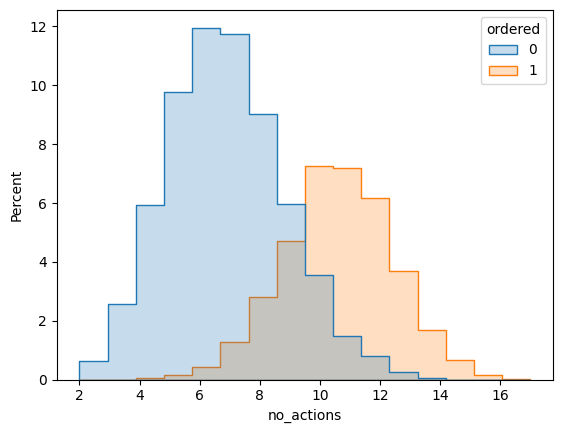

In [114]:
# Tworzenie histogramu
sns.histplot(df_num_actions, x='no_actions', bins=16, color=['lightsteelblue','red'], hue='ordered', element = 'step', stat='percent')

In [115]:
df_num_actions[df_num_actions['no_actions'] == 1].shape

(0, 26)

In [116]:
df_actions[df_actions['count'] == 1].sum()

basket_icon_click          1399
basket_add_list             989
basket_add_detail          1527
sort_by                     634
image_picker                623
account_page_click          153
promo_banner_click          507
detail_wishlist_add         238
list_size_dropdown         1412
closed_minibasket_click     510
checked_delivery_detail    1344
checked_returns_detail      443
sign_in                    1692
saw_checkout               1466
saw_sizecharts               29
saw_delivery                345
saw_account_upgrade         115
saw_homepage               1490
device_mobile               794
device_computer            1097
device_tablet               676
returning_user             1450
loc_uk                     2032
ordered                     900
count                      2567
dtype: int64

In [117]:
df_actions[df_actions['count'] == 2].shape

(644, 25)

In [118]:
df_actions[df_actions['count'] == 2].sum()

basket_icon_click           333
basket_add_list             244
basket_add_detail           371
sort_by                     146
image_picker                145
account_page_click           20
promo_banner_click          110
detail_wishlist_add          28
list_size_dropdown          351
closed_minibasket_click      97
checked_delivery_detail     326
checked_returns_detail       87
sign_in                     396
saw_checkout                368
saw_sizecharts                3
saw_delivery                 50
saw_account_upgrade           6
saw_homepage                363
device_mobile               225
device_computer             260
device_tablet               159
returning_user              400
loc_uk                      530
ordered                     244
count                      1288
dtype: int64

In [119]:
df_actions['count']

0       3785
1       3369
2       2479
3       1845
4       1666
        ... 
4677       1
4678       1
4679       1
4680       1
4681       1
Name: count, Length: 4682, dtype: int64

**No Orders**

In [120]:
top_10_actions_no_order = df_actions[df_actions.iloc[:,-2] == 0].sort_values(by='count', ascending=False)[:10]
top_10_actions_no_order

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered,count
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,1,0,3785
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,3369
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,1,0,2479
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1845
4,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,1,1,0,1666
5,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,968
6,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,957
7,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,929
9,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,571
10,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,1,0,561


In [121]:
top_10_actions_no_order.nunique().tolist()

[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 10]

In [122]:
# Sprawdź kolumny w DataFrame, aby upewnić się, że są odpowiednio nazwane
print(top_10_actions_no_order.columns)

def backward_one_hot_encoding(columns, row):
    for col in columns:
        if row[col] == 1:
            return col
    return None

columns_to_encode = ['device_mobile', 'device_computer', 'device_tablet']

# Tworzenie nowej kolumny z wynikiem
top_10_actions_no_order['device'] = top_10_actions_no_order.apply(lambda row: backward_one_hot_encoding(columns_to_encode, row), axis=1)


Index(['basket_icon_click', 'basket_add_list', 'basket_add_detail', 'sort_by',
       'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade',
       'saw_homepage', 'device_mobile', 'device_computer', 'device_tablet',
       'returning_user', 'loc_uk', 'ordered', 'count'],
      dtype='object')


In [123]:
import pandas as pd

def remove_single_value_columns(df, ignore=None, ignore_if_value=None):
    """
    This function identifies columns in a DataFrame that have only one unique value
    and returns a new DataFrame without those columns.

    Parameters:
    df (pandas.DataFrame): The input DataFrame.
    ignore (list or None): List of columns to ignore.
    ignore_if_value (Any or None): Specific value if found in the column should prevent the column from being removed.

    Returns:
    pandas.DataFrame: DataFrame without the columns that have only one unique value.
    """
    if ignore is None:
        ignore = []
    if ignore_if_value is None:
        ignore_if_value = []

    # Identify columns with a single unique value
    single_value_columns = [col for col in df.columns if df[col].nunique() == 1]

    # Process the columns to be ignored
    single_value_columns = [col for col in single_value_columns if col not in ignore and df[col].unique()[0] not in ignore_if_value]

    # Drop these columns
    df_cleaned = df.drop(columns=single_value_columns)

    return df_cleaned


In [124]:
top_10_actions_no_order_sankey.columns

Index(['saw_homepage', 'list_size_dropdown', 'returning_user', 'device',
       'count'],
      dtype='object')

In [125]:
top_10_actions_no_order_sankey = remove_single_value_columns(top_10_actions_no_order)
columns_of_interest=[
                        'saw_homepage',
                        'list_size_dropdown',
                        'returning_user',
                        'device',
                        'count',

                    ]
top_10_actions_no_order_sankey = top_10_actions_no_order_sankey[columns_of_interest]
top_10_actions_no_order_sankey

,saw_homepage,list_size_dropdown,returning_user,device,count
0,1,0,1,device_mobile,3785
1,1,0,0,device_mobile,3369
2,0,1,1,device_mobile,2479
3,0,1,0,device_mobile,1845
4,1,1,1,device_mobile,1666
5,1,1,0,device_mobile,968
6,1,0,0,device_computer,957
7,1,0,1,device_computer,929
9,1,0,0,device_tablet,571
10,1,0,1,device_tablet,561


In [126]:
plot = ParcatsSankeyPlot(top_10_actions_no_order_sankey, top_10_actions_no_order_sankey.columns.tolist(), chart='Sankey', w=1500)
fig = plot.create_plot()
fig.show()

In [127]:
df.head(5)

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
3819,1,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,1,1
3820,1,0,1,0,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,1
3821,1,1,1,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,1,1
3822,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,1,1,1
3823,1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,1,1,1


**Ordered**

In [128]:
top_10_actions_order = df_actions[df_actions.iloc[:,-2] == 1].sort_values(by='count', ascending=False)[:10]
top_10_actions_order

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered,count
8,1,1,1,0,0,0,0,0,1,0,...,0,0,1,1,0,0,1,1,1,631
11,1,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,1,1,497
14,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,1,361
16,1,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,1,1,1,340
20,1,0,1,0,0,0,0,0,1,0,...,0,0,1,1,0,0,1,1,1,316
22,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,1,308
28,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,1,1,266
29,1,1,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,1,1,262
30,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,1,1,257
33,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,251


In [129]:
print(top_10_actions_order.columns)
columns_to_encode = ['device_mobile', 'device_computer', 'device_tablet']
top_10_actions_order['device'] = top_10_actions_order.apply(lambda row: backward_one_hot_encoding(columns_to_encode, row), axis=1)

Index(['basket_icon_click', 'basket_add_list', 'basket_add_detail', 'sort_by',
       'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade',
       'saw_homepage', 'device_mobile', 'device_computer', 'device_tablet',
       'returning_user', 'loc_uk', 'ordered', 'count'],
      dtype='object')


In [130]:
top_10_actions_order_sankey = remove_single_value_columns(top_10_actions_order)
top_10_actions_order_sankey = pd.concat([top_10_actions_order_sankey, top_10_actions_order['device']], axis=1)
top_10_actions_order_sankey.head()


,basket_icon_click,basket_add_list,basket_add_detail,list_size_dropdown,saw_homepage,returning_user,count,device
8,1,1,1,1,1,1,631,device_mobile
11,1,0,1,0,1,1,497,device_mobile
14,1,0,1,0,0,1,361,device_mobile
16,1,1,0,1,1,1,340,device_mobile
20,1,0,1,1,1,1,316,device_mobile


In [131]:
columns_of_interest=[
                    'saw_homepage',
                    'list_size_dropdown',
                    'basket_icon_click',
                    'basket_add_list',
                    'basket_add_detail',
                    'device',
                    'count'
                    ]


top_10_actions_order_sankey = top_10_actions_order_sankey[columns_of_interest]
top_10_actions_order_sankey

,saw_homepage,list_size_dropdown,basket_icon_click,basket_add_list,basket_add_detail,device,count
8,1,1,1,1,1,device_mobile,631
11,1,0,1,0,1,device_mobile,497
14,0,0,1,0,1,device_mobile,361
16,1,1,1,1,0,device_mobile,340
20,1,1,1,0,1,device_mobile,316
22,0,0,0,0,1,device_mobile,308
28,1,0,1,0,0,device_mobile,266
29,0,1,1,1,1,device_mobile,262
30,1,0,0,0,1,device_mobile,257
33,0,0,0,0,1,device_mobile,251


In [132]:
plot = ParcatsSankeyPlot(top_10_actions_order_sankey, top_10_actions_order_sankey.columns.tolist(), chart='Sankey', w=1500)
fig = plot.create_plot()
fig.show()

In [133]:
top_10_actions_order['count'].sum()

3489

**Ordered but on "whole" dataset**

In [134]:
top_10_actions_order_merged = df.merge(top_10_actions_order,left_on=df.columns.tolist(), right_on=df.columns.tolist(), how='inner')
top_10_actions_order_merged.head()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered,count,device
0,1,0,1,0,0,0,0,0,1,0,...,0,1,1,0,0,1,1,1,316,device_mobile
1,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,1,1,266,device_mobile
2,1,1,0,0,0,0,0,0,1,0,...,0,1,1,0,0,1,1,1,340,device_mobile
3,1,1,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,1,262,device_mobile
4,1,0,1,0,0,0,0,0,1,0,...,0,1,1,0,0,1,1,1,316,device_mobile


In [135]:
top_10_actions_order_merged.shape

(3489, 26)

In [136]:
top_10_actions_order_merged = remove_single_value_columns(top_10_actions_order_merged, ignore_if_value=[1])
top_10_actions_order_merged.head()


,basket_icon_click,basket_add_list,basket_add_detail,list_size_dropdown,checked_delivery_detail,sign_in,saw_checkout,saw_homepage,device_mobile,returning_user,loc_uk,ordered,count
0,1,0,1,1,1,1,1,1,1,1,1,1,316
1,1,0,0,0,1,1,1,1,1,1,1,1,266
2,1,1,0,1,1,1,1,1,1,1,1,1,340
3,1,1,1,1,1,1,1,0,1,1,1,1,262
4,1,0,1,1,1,1,1,1,1,1,1,1,316


In [137]:
top_10_actions_order_merged.columns

Index(['basket_icon_click', 'basket_add_list', 'basket_add_detail',
       'list_size_dropdown', 'checked_delivery_detail', 'sign_in',
       'saw_checkout', 'saw_homepage', 'device_mobile', 'returning_user',
       'loc_uk', 'ordered', 'count'],
      dtype='object')

In [138]:
# Tworzenie nowej kolumny z wynikiem
top_10_actions_order_merged['device'] = top_10_actions_order_merged.apply(lambda row: backward_one_hot_encoding(columns_to_encode, row), axis=1)

In [139]:
columns_of_interest=[
                    'saw_homepage',
                    'list_size_dropdown',
                    'basket_icon_click',
                    'basket_add_list',
                    'basket_add_detail ',
                    'checked_delivery_detail',
                    'device',
                    'returning_user',
                    'loc_uk',
                    'saw_checkout'
                    ]


In [140]:
def add_added_to_cart_column(df):
    df['ordered'] = 0
    df.loc[(df['basket_icon_click'] == 1) | 
           (df['basket_add_list'] == 1) |
           (df['basket_add_detail'] == 1), 'added_to_cart'] = 1
    return df

top_10_actions_order_merged = add_added_to_cart_column(top_10_actions_order_merged)


In [148]:
columns_of_interest = [
    'saw_homepage',
    'list_size_dropdown',
    'basket_icon_click',
    'checked_delivery_detail',
    'device',
    'returning_user',
    'loc_uk',
    'saw_checkout'
]


In [149]:
plot = ParcatsSankeyPlot(top_10_actions_order_merged[columns_of_interest], columns_of_interest, chart='Sankey', w=1500)
fig = plot.create_plot()
fig.show()

**NO Ordered but on "whole" dataset**

In [150]:
top_10_actions_no_order_merged = df.merge(top_10_actions_no_order,left_on=df.columns.tolist(), right_on=df.columns.tolist(), how='inner')
top_10_actions_no_order_merged.head()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered,count,device
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1845,device_mobile
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,3369,device_mobile
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,0,2479,device_mobile
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,3369,device_mobile
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,1,0,3785,device_mobile


In [151]:
top_10_actions_no_order_merged = remove_single_value_columns(top_10_actions_no_order_merged, ignore_if_value=[1])
top_10_actions_no_order_merged.sort_values(by=['count'], ascending=False, inplace=True)


In [152]:
top_10_actions_no_order_merged

,list_size_dropdown,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,count,device
11463,0,1,1,0,0,1,1,3785,device_mobile
2807,0,1,1,0,0,1,1,3785,device_mobile
7848,0,1,1,0,0,1,1,3785,device_mobile
4948,0,1,1,0,0,1,1,3785,device_mobile
2794,0,1,1,0,0,1,1,3785,device_mobile
...,...,...,...,...,...,...,...,...,...
6581,0,1,0,0,1,1,1,561,device_tablet
11295,0,1,0,0,1,1,1,561,device_tablet
7725,0,1,0,0,1,1,1,561,device_tablet
214,0,1,0,0,1,1,1,561,device_tablet


In [153]:
top_10_actions_no_order_merged['device'] = top_10_actions_no_order_merged.apply(lambda row: backward_one_hot_encoding(columns_to_encode, row), axis=1)

In [156]:
columns_of_interest=[
                        'saw_homepage',
                        'list_size_dropdown',
                        'returning_user',
                        'device',
                    ]


In [157]:
plot = ParcatsSankeyPlot(top_10_actions_no_order_merged[columns_of_interest], columns_of_interest, chart='Sankey', w=1500)
fig = plot.create_plot()
fig.show()